# Use SkelUnet to squeletonized an image/map

In [1]:
import main_v2 as m

In [2]:
import matplotlib.pyplot as plt
import torch 
from torch import nn
import numpy
import pandas as pd

In [3]:
from matplotlib import image
from PIL import Image as im

### Run the model

In [23]:
dataset_test=m.maps2dDataSet_dual(csv_file=
                                        'Data/64x64_validation250_v2/maps_parameters_Tst_v2.csv',
                                        data_dir_1=
                                        'Data/64x64_validation250_v2/')
print('DataSet with:',len(dataset_test), " maps")

path_model_list=[]

#7000 to 9000
path_model_list.append('Models/MSE_exp_0.pth') 
path_model_list.append('Models/BCE_exp_0.pth')
path_model_list.append('Models/WS_exp_0.pth')
j=0
for i in path_model_list:
    print('[',j,']',i)
    j+=1

model_metric=m.UNet_maps()
model_item=0
print("Selected model:" ,path_model_list[model_item])
sample=2
print("Selected map: map" ,sample,".png")

DataSet with: 250  maps
[ 0 ] Models/MSE_exp_0.pth
[ 1 ] Models/BCE_exp_0.pth
[ 2 ] Models/WS_exp_0.pth
Selected model: Models/MSE_exp_0.pth
Selected map: map 2 .png


In [24]:
checkpoint_metric=torch.load(path_model_list[model_item], map_location=torch.device('cpu'),weights_only=False)
model_metric.load_state_dict(checkpoint_metric['state_dict'])
model_metric.eval();

input_test= dataset_test[sample] #to tensor
print(input_test.size())
# target_test=dataset_test_target[sample]

#using model
input_test_reshape=input_test.reshape(1,1,104,104)
output_test=model_metric(input_test_reshape)
output_test=output_test.reshape(1,64,64)


torch.Size([1, 104, 104])


tensor(0., grad_fn=<MinBackward1>) tensor(1., grad_fn=<MaxBackward1>)
threshold: 0.5
(64, 64)


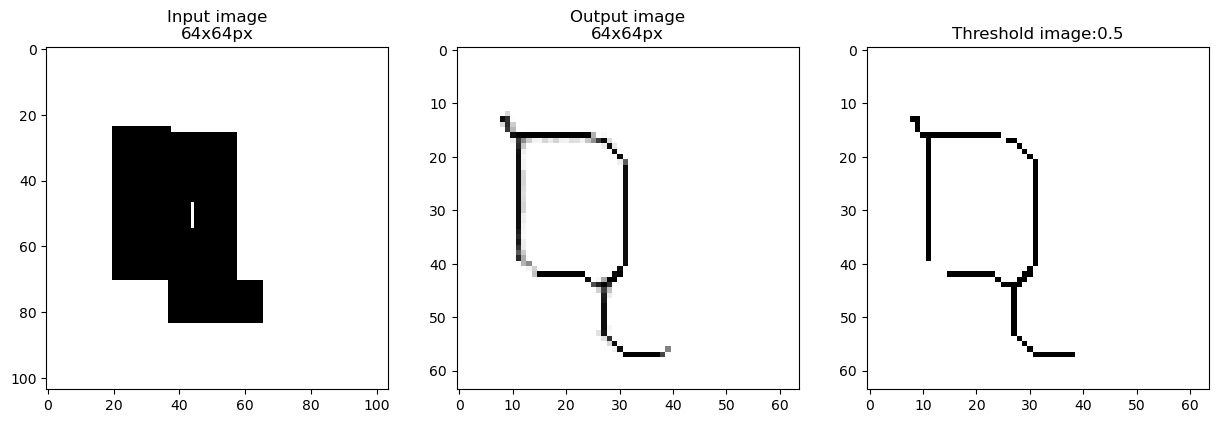

In [25]:
#trheshold
threshold=0.5
Low_t=nn.Threshold(threshold,0.0)
upper_t=nn.Threshold(1.0,0.0)
output_test_threshold=Low_t(output_test)

#plot
fig, ax = plt.subplots(1,3,figsize=(15,15))
ax[0].set_title('Input image\n64x64px')
ax[0].imshow(input_test.detach().numpy()[0],cmap='gray')
ax[1].set_title('Output image\n64x64px')
ax[1].imshow(output_test.detach().numpy()[0,:,:],cmap='gray')

print(output_test_threshold.min(),output_test_threshold.max())
print('threshold:',threshold)
out_thr=output_test_threshold.detach().numpy()[0,:,:]
print(out_thr.shape)
r=0
for i in out_thr:
    c=0    
    for j in i:
        if j>=threshold:
            out_thr[r,c]=1.0
        c+=1
    r+=1

ax[2].set_title('Threshold image:'+str(threshold))
ax[2].imshow(out_thr,cmap='gray')
plt.show()

